In [4]:
## Just for Setup



# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



c:\Users\varad\OneDrive\Documents\Aurelian Geron\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\varad\OneDrive\Documents\Aurelian Geron\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\varad\OneDrive\Documents\Aurelian Geron\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

======================================================================

## Vanishing Gradients 
During the vanishing gradients intro as we go down the layers ie back propagation the gradient descent of error reduces, after it finishes evaluating the descent it again starts from lower layer to higher and changes parameters as per the gradient descenet but as the gradient descent for lower layers wass less they were virtually unchanged                     
Or Else : the opposite can happen descent growing bigger ......

### The opposite of this is called as "Exploding Gradients"

==========================================================================

# Prevention techniques for Vanishing/Exploding are:

## 1) Glorot/He Initializations
THese are ways to prevent vanishing/exploding gradients

In [5]:
## Keras by default uses "GLOROT" Initialization 
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

## For changing the initialization based on fan(avg) instead of fan(in) just use 
## "VarianceScaling"

<Dense name=dense, built=False>

##  NonSaturating Activation Functions
THese are ways to prevent vanishing/exploding gradients

Relu's suffer from a prb: dying ReLu's                                 
Where some neurons die and dont give output other than 0 

Later LeakyRelu, then Parametric Relu

A New Function -->  Exponential Linear Unit(ELU)            
...........................But its slower than Relu

Then Scaled ELU

In [6]:
## tO USE lEAKY Relu , crate a LeakyReLU layer and add it to model just after the layer i wanna applt

model = keras.models.Sequential([
    [......]
    keras.layers.Dense(10, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2) # This is a new way to specify activationfunction as 
    # we are not specifying the no of neurons (Look the following code)
])


## Here im specifying the activation with also the number of neurons SOO THE SYNTAX IS DIFFERENT
layer = keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1628814468.py, line 4)

## 2)Batch Normalization

Even after using the above methods to prevent the VANISHING/EXPLODING, it doesn't guarantee that they wont come back 

#### This technique consists of adding an operation in the model just before or after the activation function of each hidden layer. This operation is Batch Normalization (BN).
#### After BN no need to use StandardScaler

### When to use Batch Normalization? ==> To speed up training

In [7]:
## Batch Normalization Code 
## this code wont work as i have  just written the imp part 
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="elu",kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initialization="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])



c:\Users\varad\OneDrive\Documents\Aurelian Geron\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Unrecognized keyword arguments passed to Dense: {'kernel_initialization': 'he_normal'}

## 3) Gradient Clipping
#### In this methods the the gradients are clipped during backpropagation so that they never exceed threshold!!


In [8]:
optimizer = keras.optimizers.SGD(clipvalue=1.0) # The optimizer decides how to update the weights
# clipvalue=1 means If any gradient component is bigger than +1.0 or smaller than -1.0, clamp it
# to exactly +1.0 or -1.0.


model.compile(loss="mse", optimizer = optimizer)

NameError: name 'model' is not defined

 #### You can either change "clipvalue" / "clipnorm"
 -> In clipvalue to cut the value only                                                     
 ............eg: limit=+-1                                                                     
.................grads=[-1.4,7.6]====>>> [-1, 1]                                   

For Clipnorm                                                         
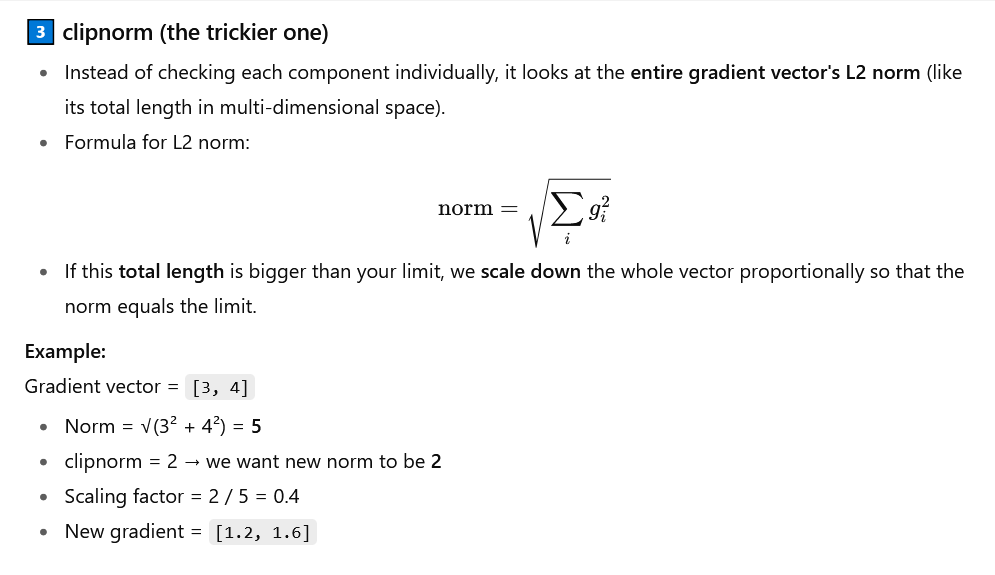
 

## Reusing Pretrained Layers 
## --->>>  This is called as **Transfer Learning**   


-> *For large DNN its not feasible to develop from scratch*                             
-> *Infact you can use some common layers of previous/other DNN's*
 


### *Transfer Learning with Keras*

Suppose a model with Fahion MNIST but excluding the Sandals and shirt is trained & got accuracey of >90 (Model A)
Model B is what is similar to Model A

In [9]:
model_A = keras.models.load_model("my_model_A.h5") # Load the model A
model_B_on_A = keras.models.Sequential(model_A.layers[:-1]) # creating model B on A's Layers

#From the above 2 line we just made the layers common between A and B . identical with SAME bodies
# Later when we do clone() then A and B will have identical layers but with DIFFERENT bodies



model_B_on_A.add(keras.layers.Dense(1,activation="sigmoid")) ## This adds a new

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'my_model_A.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [10]:
model_A_clone = keras.models.clone_model(model_A) 
# model_b_on_a is a new model with same layers as model_A but DIFFERENT OUTPUT

# model_A_clone is identitcl to model_a with literally ALL SAME 
model_A_clone.set_weights(model_A.get_weights())

NameError: name 'model_A' is not defined

 Note: As the model_B_on_A and model_A have only hidden layers in common ,                     
 training directly will give errors.                                       
 Soo during the first epochs we will freeze hidden layers and only train the model_b_on_a output layer            
 and then unfreeze the hidden layers and train the whole model

In [ ]:
## To do the above we eill set every layer's trainiable attribute to False
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd",
                     metrics=["accuracy"])

### NOTE:  Always compile the model after freeze or unfreeze the layers

In [ ]:
# NOTE: ab of above, we can fit and train for few epochs and then,
# set the trainable attribute to TRUE then compile again then fit again

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable= True  # Unfreeze the layers

optimizer = keras.optimizers.SGD(lr=1e-4)
model_B_on_A.compile(loss="binary_crossentropy", optimizer = optimizer,
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

# NOTE: THIS IS TRANSFER LEARNING

### Unsupervised Pretraining
When you dont have enough labelled data 

## Faster Optimizers

SGD → takes small steps in the direction of the steepest slope. Slow but reliable.

Momentum → remembers past directions to move faster (like a rolling ball).

RMSProp → adapts learning rate for each parameter.

Adam → combines Momentum + RMSProp. Usually the default choice in DL.

#### 1) Momentum Optimizer
It has its previous knowlegde of gradients

............Normal gradient descent = You look at the slope at each step and move a little that way. But if the slope keeps changing (zig-zag), you keep correcting direction → it’s slow.

............Momentum optimizer = Instead of only looking at the current slope, you also remember your past speed. That way, if you keep going downhill in the same general direction, you build velocity and move faster.

In [ ]:
optimizer = ekras.optimizers.SGD(lr=0.001, momentum=0.9) # This value works well for most cases 

#### 2) Nesterov Accelerated Gradient (NAG)
Just same as Normal Momentum but with looking back you also look forward 

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

### 3) AdaGrad
  
⚡ Idea of AdaGrad:                             
 .   Give each parameter its own learning rate that adapts over time.                            
 .   The more a parameter gets updated, the smaller its learning rate becomes.                            
 .   Rare features keep a higher learning rate, so they don’t get ignored.  

 If a parameter gets lots of updates → shrink its learning rate.                     
If a parameter gets few updates → keep its learning rate larger.                      

### 4) RMSProp
In AdaGrad (look at agagrad formula): it keeps adding square gradients forever: training slows down too much            
RMSProp fixes this by not letting the sum grow longer

In [ ]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

### 5) Adam & Nadam 
#### Adam= Adaptive Moment Estimation 

ADAM = MOMENTUM +RMSprop
Nadam = ADAM+NESTEROV

In [ ]:
## ADAM Code 
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
# NOTE: the beta_1 is for momentum hyperparameter and beta_2 is for RMSprop hyperparameter


### 5) AdaMax
Version of ADAM but replaces RMSProp with a more stable version 

## Learning Rate Scheduling 
1) Power Scheduling: the learning rate n decays smoothly as per this formula 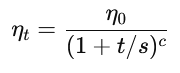
2) Exponential Scheduling: Reduces multiplicatively after every steps  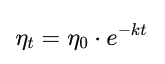
3) PieceWise Constant Scheduling: Use a constant learning rate for first steps then another for next steps
4) Performance Scheduling: Measure the validation error every N steps and reduce the learning rate by factor of Lambda
5) (MOST WIDELY USED) 1Cycle Scheduling: It makes the learning rate go up then down for 1cycle 
   

In [ ]:
## IMPLEMENTING Power Scheduling: just set the decay parameter in the optimizer
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6) ## NOTE:lr changes wrt to error

## IMPLEMENTING Exponential Scheduling: Just create a function that takes current eppoch and returns the learning rate
def exponential_decay_fn(epoch):
    return 0.01 *0.1**(epoch/20)

## Without Hardcoding n and s , we can return a function
def exponential_decay(lr0,s):
    def exponential_decay_fn(epoch):    ## NOTE:lr changes wrt epoch
        return lr0 * 0.1**(epoch/s)
    return exponential_decay_fn
exponential_decay_fn = exponential_decay(lr0 = 0.01, s=20)


### NOTE: The function that we define to compute and callback it we use LearningRateScheduler
lr_scheduler= keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train, y_train, epochs=30, callbacks=[lr_scheduler])

### BUT keras.optimizer.schedules already provide in-built Scheduling


In [ ]:
## For PieceWise Constant Scheduling:
def piecewise_constant_fn(epoch):
    if epoch <5:
        return 0.01
    elif epoch <15:
        return 0.005
    else:
        return 0.001
     
## For Performance Scheduling: just use the ReduceLROnPlateau callback
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience=5)

## Implementing the Exponential Scheduling using the keras.optimizer.schedules 
s = 20*len(X_train) 
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)

## Regularization

### 1) l1 and l2 regularization to prevent overfitting (Widely Used)


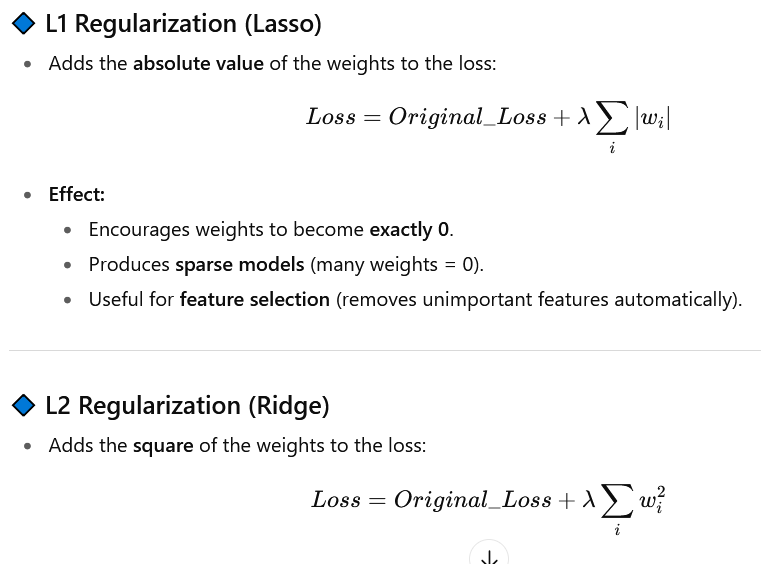

In [ ]:
layer = keras.layers.Dense(100, activation = "elu" , kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

## if want to use both use l1_l2()


In [ ]:
## Functools : for the regularization we need to write same arguments repeatedly 
## so this functools.partial will create a thin wrapper for any calls
# from functools import partial

# # Create a new function with exp = 2 fixed
# square = partial(power, exp=2)

# print(square(5))   # 25  (means 5^2)
# print(square(10))  # 100 (means 10^2)

from functools import partial 
RegularizedDense = partial(keras.layers.Dense, activation="elu",
                           kernel_initializer = "he_normal",
                           kernel_regularizer= keras.regularizers.l2(0.01))

## Activation func and etc are written above 
##THIS IS THE USE OF THE PARTIAL FUNCTION
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax"),
    kernel_initializer = "glorot_uniform"
])

### 2) Dropout

In [ ]:
## Dropout 
## regularization technique in which random neurons are dropped out during training ( give 0)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300,activation="elu",kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2), #If model is overfitting then inc the dropout rate
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation = "softmax") 
])

### 3) Monte Carlo Dropout